<a href="https://colab.research.google.com/github/sakshigodse05/AIML-Labs/blob/master/PCA_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/train.mnist.csv")

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10966,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

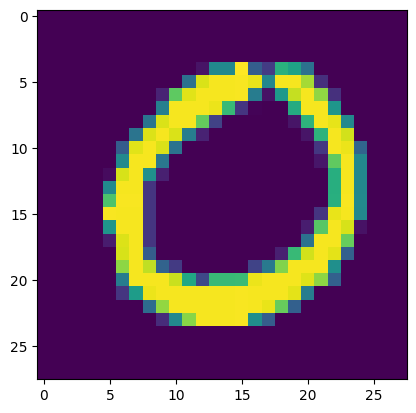

In [ ]:
plt.imshow(df.iloc[19512,1:].values.reshape(28,28))

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start=time.time()
y_pred=knn.predict(x_test)
print(time.time()-start)

27.841053009033203


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=100)


In [ ]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [ ]:
x_train_trf.shape

(33600, 100)

In [ ]:
knn =KNeighborsClassifier()


In [ ]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9692857142857143

In [ ]:
#tranforming to a 2D coordinate system
pca=PCA(n_components=2)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [ ]:
x_train_trf

array([[-226.60523462, -305.89437099],
       [  38.33583717,  461.09152047],
       [-305.49225463,  351.67141678],
       ...,
       [ -28.00133402, -596.06287179],
       [ 233.97011308,  -18.64779077],
       [1096.50373629,  254.72333173]])

In [ ]:
x_train_trf.shape

(33600, 2)

In [ ]:
import plotly.express as px

y_train_trf = y_train.astype(str)

# Create the scatter plot
fig = px.scatter(
    x=x_train_trf[:, 0],
    y=x_train_trf[:, 1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

# Show the plot
fig.show()


In [ ]:
#tranforming to a 3D coordinate system
pca=PCA(n_components=3)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [ ]:
x_train_trf

array([[-226.60523462, -305.89437099, -417.17563833],
       [  38.33583717,  461.09152047, -100.40840682],
       [-305.49225463,  351.67141678,  961.3475787 ],
       ...,
       [ -28.00133402, -596.06287179, -606.25130926],
       [ 233.97011308,  -18.64779077,  148.27481803],
       [1096.50373629,  254.72333173,  560.33354832]])

In [ ]:
x_train_trf.shape

(33600, 3)

In [ ]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=x_train_trf[:,0],y=x_train_trf[:,1],z=x_train_trf[:,2],color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20),paper_bgcolor="LightSteelBlue")
fig.show()

In [ ]:
pca.explained_variance_

array([335506.57620544, 244807.10511442, 212051.0345165 ])

In [ ]:
pca.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413])

In [ ]:
pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

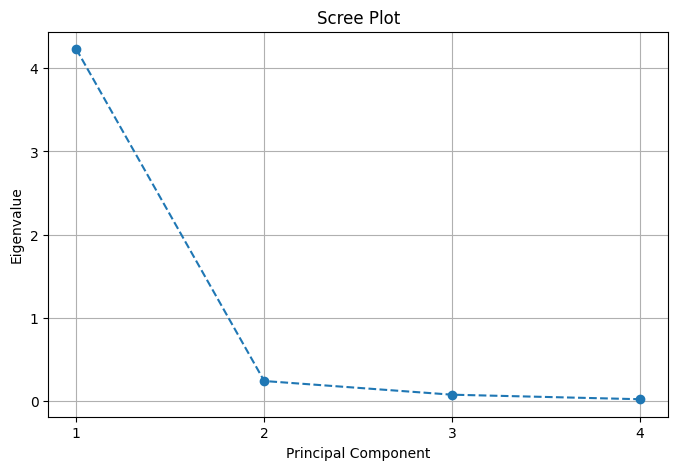

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load sample data
data = load_iris()
X = data.data

# Perform PCA
pca = PCA()
pca.fit(X)

# Eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.show()
